# 09 Build Master Modeling Tables

# **Project:** NORI  
**Author:** Yuseof J  
**Date:** 21/12/25

### **Purpose**

Combine all features and all targets, respectively. The tables created will be used in the ML pipeline.

### **Inputs**
- ``

### **Outputs**
- ``
  
--------------------------------------------------------------------------

### 0. Imports and Setup

In [51]:
# package imports
import os
import pandas as pd
import geopandas as gpd
from pathlib import Path

# specify filepaths
path_nyc_tracts = 'data/processed/nyc_tracts.gpkg'
path_targets_health = 'data/processed/model_targets_health.csv'
path_features_parks = 'data/processed/model_features_parks.csv'
path_features_canopy = 'data/processed/model_features_canopy.csv'
path_features_acs = 'data/processed/model_features_acs.csv'
#path_opp_atlas = ???
#path_walkability = ???
path_output_master_features = 'data/processed/master_model_features.csv'
path_output_master_targets = 'data/processed/master_model_targets.csv'

# ensure cwd is project root for file paths to function properly
project_root = Path(os.getcwd())            # get current directory
while not (project_root / "data").exists(): # keep moving up until in parent
    project_root = project_root.parent
os.chdir(project_root)                      # switch to parent directory

### 1. Load Data

In [61]:
# nyc tracts (spatial backbone)
gdf_nyc_tracts = gpd.read_file(path_nyc_tracts, layer="tracts")

# model targets
df_targets_health = pd.read_csv(path_targets_health)
#df_targets_econ_mobility

# model features
df_features_parks = pd.read_csv(path_features_parks)
df_features_canopy = pd.read_csv(path_features_canopy)
df_features_acs = pd.read_csv(path_features_acs)
#df_features_walkability

### 2. Create Tables

#### Model Targets Table

> Health Targets

In [53]:
# get nyc tract IDs
df_master = gdf_nyc_tracts[['GEOID']].copy()

# ensure GEOID is the same dtype before joins
df_master.GEOID = df_master.GEOID.astype(int)
df_targets_health.GEOID = df_targets_health.GEOID.astype(int)

# merge tract IDs with health targets 
df_master_model_targets = df_master.copy().merge(df_targets_health,
                                                  how='left',
                                                  on='GEOID')        

#TODO
#assert(df_cdc_nyc tract fips are all present in geoid columns)
#assert(no tract fips are missing from join)
#assert(1:1 mapping between geoid and tract fips)

In [54]:
# merge master with opportunity atlas

In [55]:
# ensure target columns were correctly joined
df_master_model_targets.head()

,GEOID,CASTHMA_CrudePrev,DIABETES_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev
0,36085024402,10.6,8.6,14.7,28.4
1,36085027705,9.9,12.0,14.9,28.1
2,36085012806,11.0,13.6,16.4,32.8
3,36047024400,10.6,11.1,19.0,24.2
4,36047023000,11.1,13.3,21.2,29.0


array([[<Axes: title={'center': 'CASTHMA_CrudePrev'}>,
        <Axes: title={'center': 'DIABETES_CrudePrev'}>],
       [<Axes: title={'center': 'MHLTH_CrudePrev'}>,
        <Axes: title={'center': 'OBESITY_CrudePrev'}>]], dtype=object)

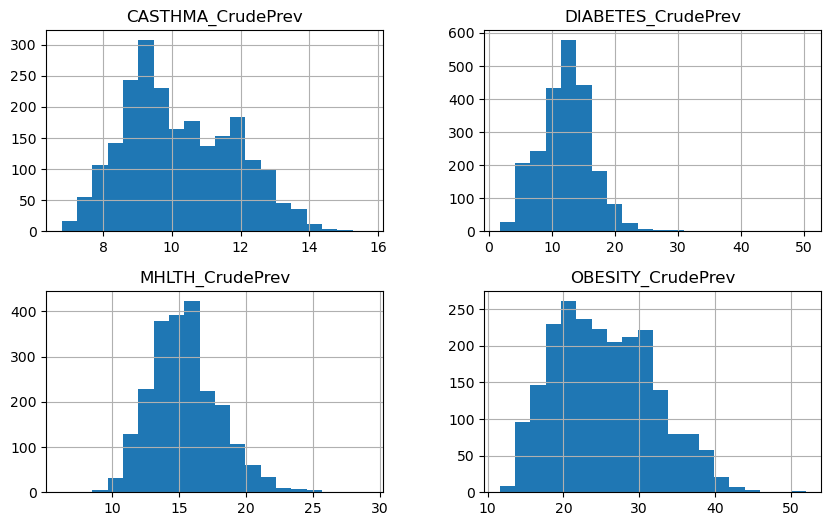

In [56]:
dist_vars = [col for col in df_master_model_targets.columns if col != "GEOID"]
df_master_model_targets[dist_vars].hist(bins=20, figsize=(10,6))

_____________________
#### Model Features Table

>Park Features

In [57]:
# ensure GEOID is the same dtype before joins
df_features_parks.GEOID = df_features_parks.GEOID.astype(int)

# merge tract IDs with park features 
df_master_model_features = df_master.merge(df_features_parks,
                                                  how='left',
                                                  on='GEOID')        

>Tree Canopy Feature

In [58]:
# ensure GEOID is the same dtype before joins
df_features_canopy.GEOID = df_features_canopy.GEOID.astype(int)

# merge tract IDs with tree canopy feature 
df_master_model_features = df_master_model_features.merge(df_features_canopy,
                                                          how='left',
                                                          on='GEOID')        

>ACS Features

In [62]:
# ensure GEOID is the same dtype before joins
df_features_acs.GEOID = df_features_acs.GEOID.astype(int)

# merge tract IDs with acs features
df_master_model_features = df_master_model_features.merge(df_features_acs,
                                                          how='left',
                                                          on='GEOID')        

In [63]:
# ensure model features were correctly joined
df_master_model_features.head()

,GEOID,distance_to_park_m,park_area_500m_centroid,park_area_1km_centroid,percent_tree_canopy,median_household_income,poverty_rate,unemployment_rate,gini_index,pct_higher_ed,pct_renters,median_gross_rent,pct_rent_burdened,pct_no_vehicle,pop_density_sq_km,pct_age_65_plus
0,36085024402,169.509962,1.206043e+05,6.859291e+05,0.031706,117981.0,0.029496,0.024523,0.4031,0.427270,0.181553,1429.0,0.324759,0.042032,2692.772684,0.193930
1,36085027705,2129.879397,0.000000e+00,0.000000e+00,0.000000,96684.0,0.099770,0.030645,0.4349,0.311325,0.182136,1799.0,0.698630,0.005988,11465.037656,0.191336
2,36085012806,0.000000,1.370448e+06,4.764153e+06,0.000000,61378.0,0.083870,0.037376,0.4349,0.259306,0.648697,1797.0,0.694598,0.004942,4022.827347,0.186134
3,36047024400,622.327717,0.000000e+00,3.497273e+05,0.000000,67500.0,0.398833,0.069648,0.3851,0.313904,0.621649,1748.0,0.601990,0.106186,23808.910470,0.078171
4,36047023000,972.144627,0.000000e+00,1.453035e+03,0.000000,51250.0,0.451197,0.177823,0.5221,0.188471,0.733522,1630.0,0.593068,0.104520,32376.888983,0.078985


array([[<Axes: title={'center': 'distance_to_park_m'}>,
        <Axes: title={'center': 'park_area_500m_centroid'}>,
        <Axes: title={'center': 'park_area_1km_centroid'}>,
        <Axes: title={'center': 'percent_tree_canopy'}>],
       [<Axes: title={'center': 'median_household_income'}>,
        <Axes: title={'center': 'poverty_rate'}>,
        <Axes: title={'center': 'unemployment_rate'}>,
        <Axes: title={'center': 'gini_index'}>],
       [<Axes: title={'center': 'pct_higher_ed'}>,
        <Axes: title={'center': 'pct_renters'}>,
        <Axes: title={'center': 'median_gross_rent'}>,
        <Axes: title={'center': 'pct_rent_burdened'}>],
       [<Axes: title={'center': 'pct_no_vehicle'}>,
        <Axes: title={'center': 'pop_density_sq_km'}>,
        <Axes: title={'center': 'pct_age_65_plus'}>, <Axes: >]],
      dtype=object)

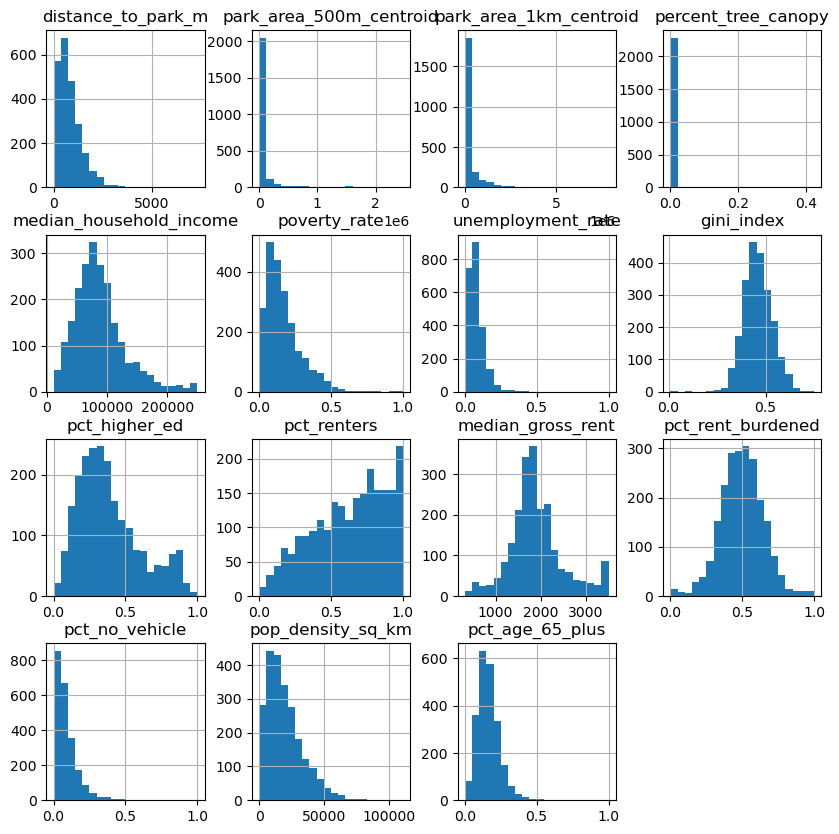

In [65]:
dist_vars = [col for col in df_master_model_features.columns if col != "GEOID"]
df_master_model_features[dist_vars].hist(bins=20, figsize=(10,10))

### 3. Save Data

In [49]:
# export master tables
df_master_model_features.to_csv(path_output_master_features, index=False)
df_master_model_targets.to_csv(path_output_master_targets, index=False)